In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
train=pd.read_csv('sales_train.csv')
test=pd.read_csv('test.csv')

train.info()
test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


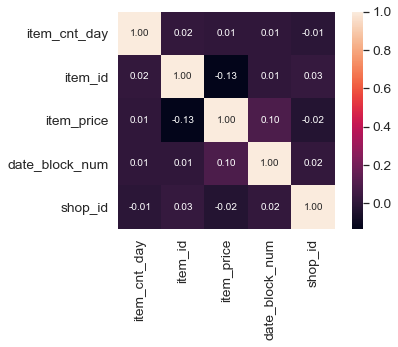

In [3]:
# 計算相關性
corrmat = train.corr()
k = 10 
cols = corrmat.nlargest(k, 'item_cnt_day')['item_cnt_day'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



In [4]:
#挑選特徵值
selected_features = ['item_id','shop_id' ]

X_train = train[selected_features]
X_test = test[selected_features]
y_train = train['item_cnt_day']

# 進行特徵向量化
from sklearn.feature_extraction import DictVectorizer
dict_vec = DictVectorizer(sparse=False)

X_train = dict_vec.fit_transform(X_train.to_dict(orient='record'))
X_test = dict_vec.transform(X_test.to_dict(orient='record'))



/Users/kevinxie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [5]:
# 用GradientBoostingRegressor進行預測
from sklearn.ensemble import GradientBoostingRegressor
rfr = GradientBoostingRegressor()
rfr.fit(X_train, y_train)
rfr_y_predict = rfr.predict(X_test)


rfr_submission = pd.DataFrame({'ID': test['ID'], 'item_cnt_month': rfr_y_predict})
rfr_submission.to_csv('sub.csv', index=False,sep=',')